In [1]:
# correlation_final

In [2]:
#import
import pandas as pd
import numpy as np
import datetime

# 그래프 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 에러 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 폰트
import platform

if platform.system() == 'Darwin':    # 맥
    font_name = 'AppleGothic'
elif platform.system() == 'Linux':   # 리눅스
    font_name = 'NanumGothic'
elif platform.system() == 'Windows': # 윈도우
    font_name = 'Malgun Gothic'
else:
    print('알수없는 시스템. 미적용')

plt.rc('font', family=font_name)

In [4]:
df_test = pd.read_csv('./data/maindata.csv', encoding='utf-8')
df_typ = pd.read_csv('./data/typhoon.csv', encoding='euc-kr')

In [5]:
# df_test
# df_typ
# df

# 태풍수치화

In [6]:
df_test.태풍.replace('x',0,inplace= True)

In [7]:
df_test.태풍.replace('o',4000,inplace= True)

In [8]:
df_test.dtypes

날짜        object
평균         int64
평년         int64
현재일기      object
현재기온     float64
이슬점온도    float64
체감온도     float64
강수량      float64
습도       float64
풍향        object
풍속       float64
해면기압     float64
태풍         int64
dtype: object

##  결측치 제거

In [9]:
# 넌값 찾기 
df_test.isnull().any()

날짜       False
평균       False
평년       False
현재일기     False
현재기온      True
이슬점온도     True
체감온도      True
강수량       True
습도        True
풍향       False
풍속        True
해면기압      True
태풍       False
dtype: bool

In [10]:
# 넌값 찾기 
df_typ.isnull().any()

태풍명            False
발생             False
소멸             False
Unnamed: 3      True
Unnamed: 4      True
Unnamed: 5      True
Unnamed: 6      True
Unnamed: 7      True
Unnamed: 8      True
Unnamed: 9      True
Unnamed: 10     True
Unnamed: 11     True
Unnamed: 12     True
Unnamed: 13     True
Unnamed: 14     True
Unnamed: 15     True
Unnamed: 16     True
Unnamed: 17     True
Unnamed: 18     True
Unnamed: 19     True
Unnamed: 20     True
Unnamed: 21     True
Unnamed: 22     True
Unnamed: 23     True
Unnamed: 24     True
dtype: bool

# 산점도

In [11]:
# 결측 
df_test.fillna(0)
# df.replace('NaN',0 ,)

,날짜,평균,평년,현재일기,현재기온,이슬점온도,체감온도,강수량,습도,풍향,풍속,해면기압,태풍
0,2015-01-02,1287,1561,-,2.1,-15.4,-2.3,0.0,26.0,북서,17.6,1021.4,0
1,2015-01-05,1287,1449,-,10.4,-3.3,10.4,0.0,38.0,서북서,2.9,1017.9,0
2,2015-01-06,1303,1432,-,9.1,-16.2,6.7,11.5,15.0,북서,15.8,1011.3,0
3,2015-01-07,1277,1411,-,2.5,-28.5,-1.6,0.0,8.0,북서,16.9,1018.0,0
4,2015-01-08,1352,1407,-,3.3,-19.4,-0.1,0.0,17.0,북서,13.7,1022.8,0
5,2015-01-09,1333,1403,-,5.1,-12.4,1.6,0.0,27.0,북서,16.6,1022.9,0
6,2015-01-12,1329,1352,-,4.9,-14.0,2.0,0.0,24.0,서북서,13.0,1033.5,0
7,2015-01-13,1329,1340,-,9.1,-8.9,7.7,0.0,27.0,서남서,9.0,1033.1,0
8,2015-01-14,1329,1326,-,5.3,-1.4,3.9,0.5,62.0,서북서,6.5,1025.3,0
9,2015-01-15,1262,1321,-,9.3,-1.4,6.6,0.5,47.0,북서,18.7,1020.1,0


In [12]:
df_typ.fillna(0)
# df.replace('NaN',0 ,)

,태풍명,발생,소멸,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,찬홈,2015.06.30 12:00,2015.07.12 21:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,낭카,2015.07.03 18:00,2015.07.17 18:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,할롤라,2015.07.13 00:00,2015.07.26 15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,고니,2015.08.14 18:00,2015.08.25 21:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,말라카스,2016.09.12 18:00,2016.09.20 09:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,차바,2016.09.27 18:00,2016.10.05 15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,난마돌,2017.07.02 00:00,2017.07.04 18:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,노루,2017.07.21 00:00,2017.08.08 06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,탈림,2017.09.09 12:00,2017.09.18 00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,쁘라삐룬,2018.06.29 00:00,2018.07.04 09:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 풍속

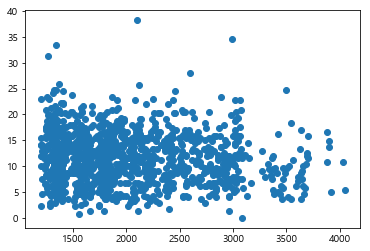

In [13]:
# 산점도 - 풍속
scatter_plot = plt.figure()
axes = scatter_plot.add_subplot(1,1,1)
axes.scatter(df_test['평균'],df_test['풍속'])

# 이상치 발견 

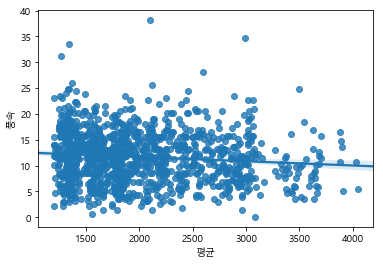

In [14]:
# scatterplot
ax = plt.subplots()
ax = sns.regplot(x='평균', y='풍속', data=df_test)

# ax_heatmap_data.figure.savefig('./output/heatmap_data_태풍.png')

 ## 풍속 이상치 제거 =>25

In [15]:
df_test.drop(index= df_test[df_test.풍속>= 25].index, inplace= True)
df_test[df_test.풍속>= 25]

,날짜,평균,평년,현재일기,현재기온,이슬점온도,체감온도,강수량,습도,풍향,풍속,해면기압,태풍


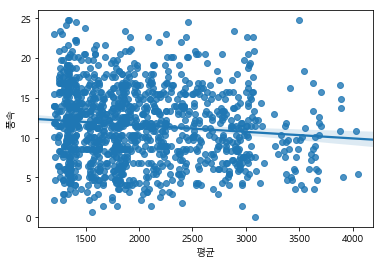

In [16]:
# scatterplot
ax = plt.subplots()
ax = sns.regplot(x='평균', y='풍속', data=df_test)

# ax_heatmap_data.figure.savefig('./output/heatmap_data_태풍.png')

### 체감온도

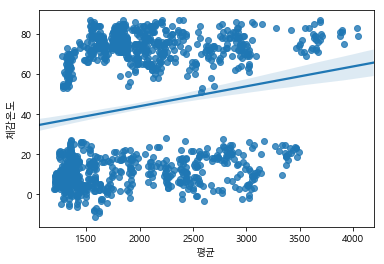

In [17]:
# scatterplot -체감온도
ax = plt.subplots()
ax = sns.regplot(x='평균', y='체감온도', data=df_test)

### 이슬점온도

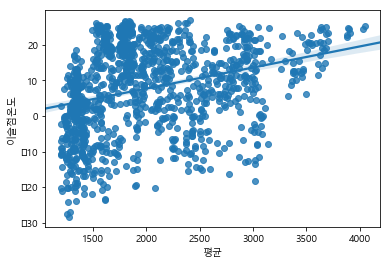

In [18]:
# scatterplot - 이슬점온도
ax = plt.subplots()
ax = sns.regplot(x='평균', y='이슬점온도', data=df_test)

### 습도

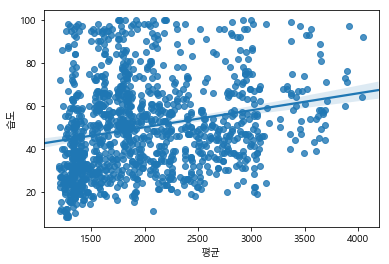

In [19]:
# scatterplot - 습도
ax = plt.subplots()
ax = sns.regplot(x='평균', y='습도', data=df_test)

# 강수량

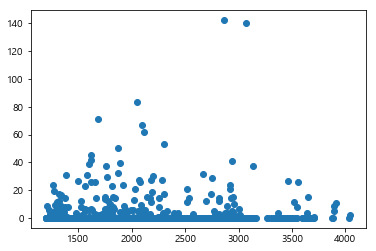

In [20]:
# 산점도  - 강수량 
scatter_plot = plt.figure()
axes = scatter_plot.add_subplot(1,1,1)
axes.scatter(df_test['평균'],df_test['강수량'])

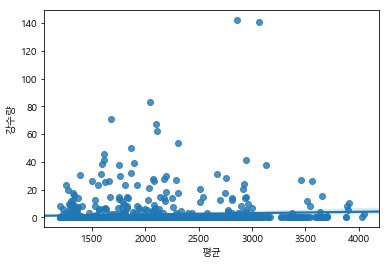

In [21]:
# scatterplot
ax = plt.subplots()
ax = sns.regplot(x='평균', y='강수량', data=df_test)

## 이상치 제거

### 이상치 제거 -> 강수량>= 140

In [22]:
# df[df.강수량>= 140]
df_test.drop(index= df_test[df_test.강수량>= 140].index, inplace= True)
df_test[df_test.강수량>= 140]

,날짜,평균,평년,현재일기,현재기온,이슬점온도,체감온도,강수량,습도,풍향,풍속,해면기압,태풍


## 다시 제거 

### 이상치 제거 -> 강수량>= 70

In [23]:
# df[df.강수량>= 70]
df_test.drop(index= df_test[df_test.강수량>= 70].index, inplace= True)
df_test[df_test.강수량>= 70]

,날짜,평균,평년,현재일기,현재기온,이슬점온도,체감온도,강수량,습도,풍향,풍속,해면기압,태풍


# 태풍
- 환이 코드에 태풍가격 시각화 

In [24]:
df_test_t = df_test.iloc[:]
df_test_t

,날짜,평균,평년,현재일기,현재기온,이슬점온도,체감온도,강수량,습도,풍향,풍속,해면기압,태풍
0,2015-01-02,1287,1561,-,2.1,-15.4,-2.3,0.0,26.0,북서,17.6,1021.4,0
1,2015-01-05,1287,1449,-,10.4,-3.3,10.4,0.0,38.0,서북서,2.9,1017.9,0
2,2015-01-06,1303,1432,-,9.1,-16.2,6.7,11.5,15.0,북서,15.8,1011.3,0
3,2015-01-07,1277,1411,-,2.5,-28.5,-1.6,0.0,8.0,북서,16.9,1018.0,0
4,2015-01-08,1352,1407,-,3.3,-19.4,-0.1,0.0,17.0,북서,13.7,1022.8,0
5,2015-01-09,1333,1403,-,5.1,-12.4,1.6,0.0,27.0,북서,16.6,1022.9,0
6,2015-01-12,1329,1352,-,4.9,-14.0,2.0,0.0,24.0,서북서,13.0,1033.5,0
7,2015-01-13,1329,1340,-,9.1,-8.9,7.7,0.0,27.0,서남서,9.0,1033.1,0
8,2015-01-14,1329,1326,-,5.3,-1.4,3.9,0.5,62.0,서북서,6.5,1025.3,0
9,2015-01-15,1262,1321,-,9.3,-1.4,6.6,0.5,47.0,북서,18.7,1020.1,0


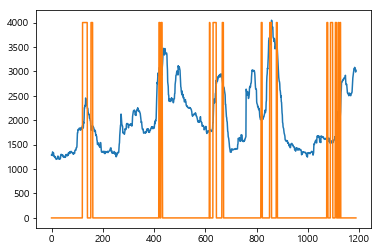

In [25]:
plot = plt.figure()
axes = plot.add_subplot(1,1,1)
axes.plot(df_test_t['평균'])
axes.plot(df_test_t['태풍'])

# 상관계수 

In [26]:
df_test.columns

Index(['날짜', '평균', '평년', '현재일기', '현재기온', '이슬점온도', '체감온도', '강수량', '습도', '풍향',
       '풍속', '해면기압', '태풍'],
      dtype='object')

### + 태풍

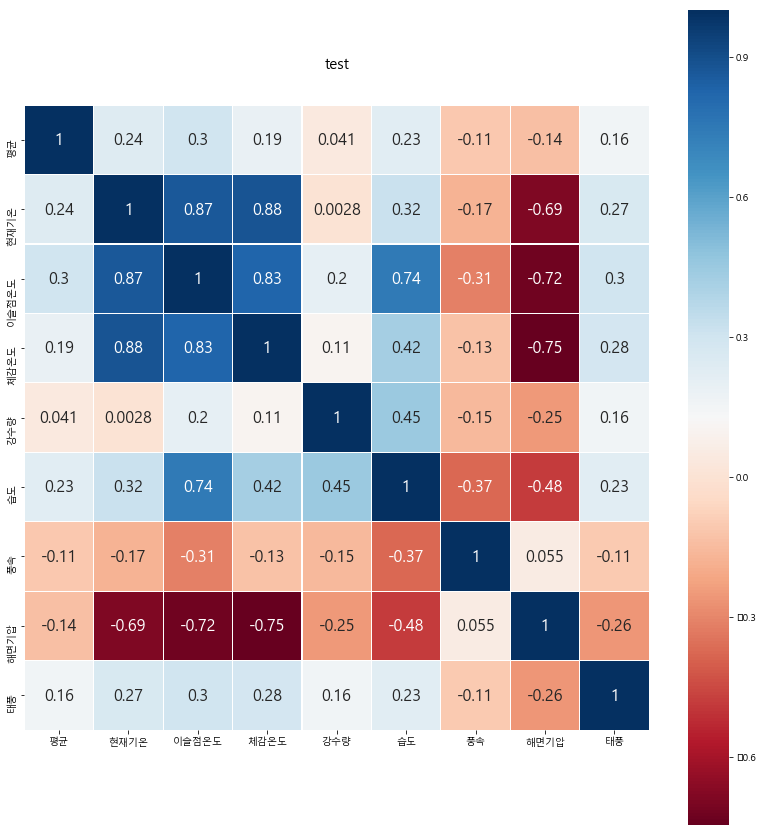

In [27]:
heatmap_data_typ  = df_test[['평균','현재기온', '이슬점온도', '체감온도', '강수량', '습도',
       '풍속', '해면기압', '태풍']]

colormap = plt.cm.RdBu 
plt.figure(figsize=(14, 15))
plt.title('test', y=1.05, size=15)

sns.heatmap(heatmap_data_typ.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

# 태풍 (8-20) 상관관계

In [28]:
df_E = pd.read_csv('./data/maindata_torEffect.csv', encoding='utf-8')

In [29]:
df_E = pd.get_dummies(df_E, columns=['태풍영향8'], prefix='tor8')
df_E = pd.get_dummies(df_E, columns=['태풍영향10'], prefix='tor10')
df_E = pd.get_dummies(df_E, columns=['태풍영향12'], prefix='tor12')
df_E = pd.get_dummies(df_E, columns=['태풍영향14'], prefix='tor14')
df_E = pd.get_dummies(df_E, columns=['태풍영향16'], prefix='tor16')
df_E = pd.get_dummies(df_E, columns=['태풍영향18'], prefix='tor18')
df_E = pd.get_dummies(df_E, columns=['태풍영향20'], prefix='tor20')

In [30]:
df_E['tor20_o'].value_counts()

0    873
1    315
Name: tor20_o, dtype: int64

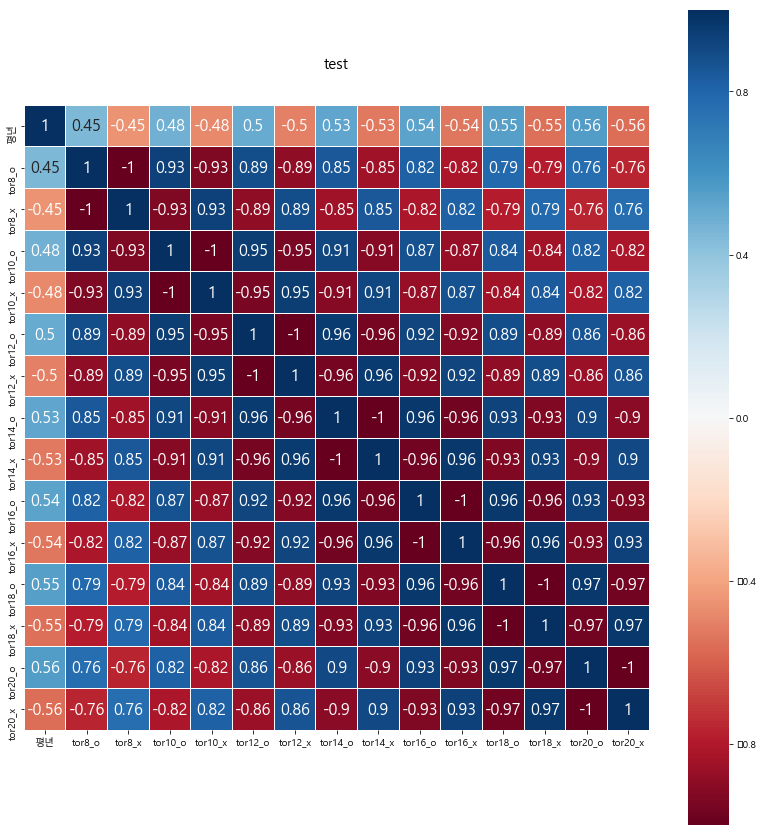

In [31]:
#  원핫 
# 태풍 =>'tor_o' 'tor_x'
heatmap_data  = df_E[['평년','tor8_o', 'tor8_x','tor10_o', 'tor10_x',
                      'tor12_o', 'tor12_x','tor14_o', 'tor14_x','tor16_o', 'tor16_x','tor18_o', 'tor18_x','tor20_o', 'tor20_x']]

colormap = plt.cm.RdBu 
plt.figure(figsize=(14, 15))
plt.title('test', y=1.05, size=15)

ax_heatmap_data = sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

ax_heatmap_data.figure.savefig('./output/heatmap_data_태풍.png')

# 10년치

In [32]:
# 파일 이름.확장자 명 
path = 'maindata_moo.csv'
# 업로드 변수는 df로 통일 
df = pd.read_csv('./data/'+ path, encoding='utf-8')

In [33]:
# 월별 추출 
def get_month(year,month):
    # 구별
    if month <10 : 
        month = str(month) 
        month = '0'+ month
    elif month >= 10:
        month = str(month)
    # 포문        
    li_year = [ i[0] for i in df.날짜.str.split('-') ]
    li_month = [ i[1] for i in df.날짜.str.split('-') ]

    # 
    idx = list()
    for i in range(len(li_year)):
        if li_year[i] == str(year):
            if li_month[i] == month:
                idx.append(i)
    
    each_ye_mon = df.iloc[idx]
    
    return each_ye_mon

# 연도 추출 
def get_year(year):
    # 포문 
    li_year = [ i[0] for i in df.날짜.str.split('-') ]
#     li_month = [ i[1] for i in main_data.날짜.str.split('-') ]

    li = df.shape[0]
    idx = list()

    for i in range(li):
        if li_year[i] == str(year):
            idx.append(i)
    #         if li_month[i] == "01":
    #             idx.append(i)

    each_year = df.iloc[idx]
    
    return each_year

In [34]:
df.dtypes

날짜           object
avg_moo       int64
avgY_moo      int64
현재기온        float64
이슬점온도       float64
체감온도        float64
습도          float64
풍속          float64
해면기압        float64
dtype: object

### 넌값 찾기 

In [35]:
df.isnull().any()

날짜          False
avg_moo     False
avgY_moo    False
현재기온         True
이슬점온도        True
체감온도         True
습도           True
풍속           True
해면기압         True
dtype: bool

### 넌값 => 0

In [36]:
df.fillna(0)
# df.replace('NaN',0 ,)

,날짜,avg_moo,avgY_moo,현재기온,이슬점온도,체감온도,습도,풍속,해면기압
0,2010-01-04,1092,1334,-6.0,-7.3,-9.6,90.0,7.6,1007.7
1,2010-01-05,1129,1314,-11.7,-16.2,-22.3,69.0,33.8,1019.2
2,2010-01-06,1151,1287,-10.6,-17.6,-16.0,56.0,10.1,1021.5
3,2010-01-07,1162,1275,-6.1,-13.9,-6.1,54.0,1.8,1022.8
4,2010-01-08,1112,1255,-3.8,-11.7,-8.2,54.0,11.2,1020.1
5,2010-01-11,1094,1206,-4.4,-12.3,-11.0,54.0,21.2,1019.4
6,2010-01-12,1094,1204,-10.6,-19.0,-19.3,50.0,23.8,1015.8
7,2010-01-13,1094,1210,-14.5,-23.8,-25.7,45.0,32.0,1019.1
8,2010-01-14,1128,1210,-8.2,-22.0,-15.1,32.0,17.6,1025.2
9,2010-01-15,1147,1210,-3.9,-13.0,-10.4,49.0,21.6,1027.0


## 평균 , 평년  (10년)

In [ ]:
df_test = df.iloc[:]
# 
x = df_test['avg_moo']
x_ = df_test['avgY_moo']
# 고정 
y = df_test['날짜']


plot = plt.figure()
axes = plot.add_subplot(1,1,1)
axes.plot(y,x) # 일평 
axes.plot(y,x_) # 월평
# 빅 타이틀 
axes.set_title('평균, 평년')
axes.set_xlabel('날짜')
axes.set_ylabel('금액')

# 변수.figure.savefig(path) => 그냥 변수.savefig 안될때 
axes.figure.savefig('./output/전_파일_평균_평년 .png')

# kdeplot =>   변량 또는 이변량 커널 밀도 추정

In [ ]:
# 히스토그램과 kdeplot을 같이 그려주는 것
ax = plt.subplot()
ax = sns.distplot(df['avg_moo'])

ax1 = plt.subplot()
ax1 = sns.distplot(df['avgY_moo'])

plt.figure(figsize=(100, 30))

# 2018년5월 - 상관관계

### x="avg_moo", y="avgY_moo"

In [ ]:
ax = sns.jointplot(x="avg_moo", y="avgY_moo", data=df, kind="kde")
plt.suptitle("Joint Plot 과 Kernel Density Plot", y=1.02)
plt.show()

ax.savefig('./output/Joint Plot_Kernel Density Plot.png')

In [ ]:
test_2018_05= get_year(2018)

ax=sns.pairplot(test_2018_05)
plt.title("test_2018_05")
plt.show()

ax.savefig('./output/test_2018_05.png')

# 상관계수_2(태풍없이, 10년치)

In [ ]:
heatmap_data  = df[['avg_moo', 'avgY_moo', '현재기온', '이슬점온도', '체감온도', '습도', '풍속',
       '해면기압']]

colormap = plt.cm.RdBu 
plt.figure(figsize=(14, 15))
plt.title('test', y=1.05, size=15)

ax_heatmap_data = sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})
# 변수.figure.savefig(path) => 그냥 변수.savefig 안될때 

ax_heatmap_data.figure.savefig('./output/heatmap_data.png')